In [1]:
# Need to implement DT, RF, ADA, XG
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import sklearn
from sklearn.tree import DecisionTreeRegressor    # Decision Tree
from sklearn.ensemble import RandomForestRegressor # RF
from sklearn.ensemble import AdaBoostRegressor #ADABoost
from xgboost import XGBRegressor # XGBoost

# Package for data partitioning
from sklearn.model_selection import train_test_split

# Package for generating confusion matrix
from sklearn import metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

# Package for generating classification report
from sklearn.metrics import classification_report

# Import packages to implement Stratified K-fold CV
from sklearn.model_selection import KFold 
from sklearn.model_selection import StratifiedKFold

# Import Package to implement GridSearch CV
from sklearn.model_selection import GridSearchCV

# Importing package for Randomized Search CV
from sklearn.model_selection import RandomizedSearchCV

import time
from datetime import datetime
from pprint import pprint
import pickle 

import warnings
warnings.filterwarnings('ignore')

In [2]:
traffic_base_df = pd.read_csv('Traffic_Volume.csv')
traffic_base_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              61 non-null     object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   date_time            48204 non-null  object 
 8   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB


In [3]:
traffic_base_df['weather_description'].replace(to_replace='Sky is Clear',value='sky is clear',inplace=True)
traffic_base_df['weather_description'].value_counts(normalize=False)

weather_description
sky is clear                           13391
mist                                    5950
overcast clouds                         5081
broken clouds                           4666
scattered clouds                        3461
light rain                              3372
few clouds                              1956
light snow                              1946
moderate rain                           1664
haze                                    1360
light intensity drizzle                 1100
fog                                      912
proximity thunderstorm                   673
drizzle                                  651
heavy snow                               616
heavy intensity rain                     467
snow                                     293
proximity shower rain                    136
thunderstorm                             125
heavy intensity drizzle                   64
thunderstorm with heavy rain              63
thunderstorm with light rain       

In [4]:
traffic_base_df.groupby('holiday').groups


{'Christmas Day': [2360, 10939, 20185, 29503, 29504, 40057], 'Columbus Day': [126, 9455, 18946, 27224, 37882], 'Independence Day': [7414, 16204, 24654, 35057, 45547], 'Labor Day': [8742, 18041, 26319, 26320, 36882, 47330, 47331], 'Martin Luther King Jr Day': [11611, 30080, 30081, 40655, 40656, 40657], 'Memorial Day': [6430, 14645, 23781, 34095, 44441], 'New Years Day': [2559, 11132, 20344, 20345, 29674, 40255], 'State Fair': [8575, 17750, 26002, 36551, 46936], 'Thanksgiving Day': [1370, 10181, 19675, 19676, 28399, 39180], 'Veterans Day': [1123, 9768, 19410, 27983, 38803], 'Washingtons Birthday': [3697, 12303, 21294, 31145, 41611]}

In [5]:
#h = traffic_base_df['holiday']
#h.iloc[126:149]

# Ensuring Holiday Label is present on entire day's worth of data
traffic_base_df.iloc[2361:2384,0] = 'Christmas Day'
traffic_base_df.iloc[10940:10963,0] = 'Christmas Day'
traffic_base_df.iloc[20186:20209,0] = 'Christmas Day'
traffic_base_df.iloc[29504:29527,0] = 'Christmas Day'
traffic_base_df.iloc[40058:40081,0] = 'Christmas Day'

traffic_base_df.iloc[127:150,0] = 'Columbus Day'
traffic_base_df.iloc[9456:9479,0] = 'Columbus Day'
traffic_base_df.iloc[18947:18970,0] = 'Columbus Day'
traffic_base_df.iloc[27225:27248,0] = 'Columbus Day'
traffic_base_df.iloc[37883:37906,0] = 'Columbus Day'

traffic_base_df.iloc[7415:7438,0] = 'Independance Day'
traffic_base_df.iloc[16205:16228,0] = 'Independance Day'
traffic_base_df.iloc[24655:24678,0] = 'Independance Day'
traffic_base_df.iloc[35058:35081,0] = 'Independance Day'
traffic_base_df.iloc[45548:45571,0] = 'Independance Day'


traffic_base_df.iloc[8743:8766,0] = 'Labor Day'
traffic_base_df.iloc[18042:18065,0] = 'Labor Day'
traffic_base_df.iloc[26320:26343,0] = 'Labor Day'
traffic_base_df.iloc[36883:36906,0] = 'Labor Day'
traffic_base_df.iloc[47331:47354,0] = 'Labor Day'

traffic_base_df.iloc[11612:11635,0] = 'Martin Luther King Jr Day'
traffic_base_df.iloc[30081:30104,0] = 'Martin Luther King Jr Day'
traffic_base_df.iloc[40656:40679,0] = 'Martin Luther King Jr Day'

traffic_base_df.iloc[6431:6454,0] = 'Memorial Day'
traffic_base_df.iloc[14646:14669,0] = 'Memorial Day'
traffic_base_df.iloc[23782:23805,0] = 'Memorial Day'
traffic_base_df.iloc[34096:34119,0] = 'Memorial Day'
traffic_base_df.iloc[44442:44465,0] = 'Memorial Day'

traffic_base_df.iloc[2560:2583,0] = 'New Years Day'
traffic_base_df.iloc[11133:11156,0] = 'New Years Day'
traffic_base_df.iloc[20345:20368,0] = 'New Years Day'
traffic_base_df.iloc[29675:29698,0] = 'New Years Day'
traffic_base_df.iloc[40256:40279,0] = 'New Years Day'

traffic_base_df.iloc[8576:8599,0] = 'State Fair'
traffic_base_df.iloc[17751:17774,0] = 'State Fair'
traffic_base_df.iloc[26003:26026,0] = 'State Fair'
traffic_base_df.iloc[36552:36575,0] = 'State Fair'
traffic_base_df.iloc[46937:46960,0] = 'State Fair'

traffic_base_df.iloc[1371:1394,0] = 'Thanksgiving Day'
traffic_base_df.iloc[10182:10205,0] = 'Thanksgiving Day'
traffic_base_df.iloc[19676:19699,0] = 'Thanksgiving Day'
traffic_base_df.iloc[28400:28423,0] = 'Thanksgiving Day'
traffic_base_df.iloc[39181:39204,0] = 'Thanksgiving Day'

traffic_base_df.iloc[1124:1147,0] = 'Veterans Day'
traffic_base_df.iloc[9769:9792,0] = 'Veterans Day'
traffic_base_df.iloc[19411:19434,0] = 'Veterans Day'
traffic_base_df.iloc[27984:28007,0] = 'Veterans Day'
traffic_base_df.iloc[38804:38827,0] = 'Veterans Day'

traffic_base_df.iloc[3698:3721,0] = 'Washingtons Birthday'
traffic_base_df.iloc[12304:12327,0] = 'Washingtons Birthday'
traffic_base_df.iloc[21295:21318,0] = 'Washingtons Birthday'
traffic_base_df.iloc[31146:31169,0] = 'Washingtons Birthday'
traffic_base_df.iloc[41612:41635,0] = 'Washingtons Birthday'





In [6]:
traffic_base_df['date_time'].values
traffic_base_df['month'] = pd.DatetimeIndex(traffic_base_df['date_time']).month 
traffic_base_df['weekday'] = pd.DatetimeIndex(traffic_base_df['date_time']).weekday
traffic_base_df['time'] = pd.DatetimeIndex(traffic_base_df['date_time']).hour
# split date time into date and time columns 
# remove year


In [7]:

df2 = traffic_base_df.drop(columns=['date_time','weather_description'])
df2 = df2[['holiday','temp','rain_1h','snow_1h','clouds_all',
                                   'weather_main','month','weekday','time','traffic_volume']]

#traffic_base_df.to_csv(index=False)
df2.to_csv('traffic_clean.csv', encoding='utf-8', index=False)
# create new dataframe and turn into csv to use in streamlit
df2

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,month,weekday,time,traffic_volume
0,NaN,288.28,0.0,0.0,40,Clouds,10,1,9,5545
1,NaN,289.36,0.0,0.0,75,Clouds,10,1,10,4516
2,NaN,289.58,0.0,0.0,90,Clouds,10,1,11,4767
3,NaN,290.13,0.0,0.0,90,Clouds,10,1,12,5026
4,NaN,291.14,0.0,0.0,75,Clouds,10,1,13,4918
...,...,...,...,...,...,...,...,...,...,...
48199,NaN,283.45,0.0,0.0,75,Clouds,9,6,19,3543
48200,NaN,282.76,0.0,0.0,90,Clouds,9,6,20,2781
48201,NaN,282.73,0.0,0.0,90,Thunderstorm,9,6,21,2159
48202,NaN,282.09,0.0,0.0,90,Clouds,9,6,22,1450


In [8]:
#DF to CSV for use on website

In [9]:
X = df2.drop(columns=['traffic_volume'])
y = df2['traffic_volume']

cat_var = ['holiday','weather_main','month','weekday','time']
X_encoded = pd.get_dummies(X, columns=cat_var)

print(X_encoded)

         temp  rain_1h  snow_1h  clouds_all  holiday_Christmas Day  \
0      288.28      0.0      0.0          40                  False   
1      289.36      0.0      0.0          75                  False   
2      289.58      0.0      0.0          90                  False   
3      290.13      0.0      0.0          90                  False   
4      291.14      0.0      0.0          75                  False   
...       ...      ...      ...         ...                    ...   
48199  283.45      0.0      0.0          75                  False   
48200  282.76      0.0      0.0          90                  False   
48201  282.73      0.0      0.0          90                  False   
48202  282.09      0.0      0.0          90                  False   
48203  282.12      0.0      0.0          90                  False   

       holiday_Columbus Day  holiday_Independance Day  \
0                     False                     False   
1                     False                  

In [10]:
train_X, test_X, train_y, test_y = train_test_split(X_encoded, y, test_size = 0.2, random_state = 17)

In [11]:
# DT Regressor
dt_r = DecisionTreeRegressor(random_state=11)

In [12]:
hyper_params = {
    'max_depth': list(range(8,10)),
    'min_samples_split': list(range(2,5)),
    'min_samples_leaf': list(range(3,15))
}
dt_folds = KFold(n_splits=5, shuffle=True,random_state=99)

dt_random_model_cv = RandomizedSearchCV(estimator=dt_r,
                                 param_distributions=hyper_params,
                                 n_iter=20,
                                 scoring = 'r2',
                                 verbose= 1,
                                 random_state=33,
                                 n_jobs =-1)



In [13]:
start = time.time()            # Start Time
dt_random_model_cv.fit(train_X, train_y)
stop = time.time()             # End Time
print(f"Training time: {stop - start}s")

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Training time: 9.406239748001099s


In [14]:
print('Initial score: ', dt_random_model_cv.best_score_)

# Return set of parameters with the best performance
print('Initial parameters: ', dt_random_model_cv.best_params_)

Initial score:  0.7222847951882488
Initial parameters:  {'min_samples_split': 4, 'min_samples_leaf': 4, 'max_depth': 9}


In [15]:
# Retune DT with Grid Search

dt_grid_params= {
    'max_depth': [6,7,8,9,10],
    'min_samples_leaf': [2,3,4,5],
    'min_samples_split': [2,3,4,5]
}
dt_grid_params

{'max_depth': [6, 7, 8, 9, 10],
 'min_samples_leaf': [2, 3, 4, 5],
 'min_samples_split': [2, 3, 4, 5]}

In [16]:
dt_grid_model_cv = GridSearchCV(estimator = dt_r, 
                        param_grid = dt_grid_params, 
                        scoring= 'r2', 
                        cv = dt_folds, 
                        verbose = 1,
                        n_jobs = -1)

In [17]:
# Fit the model
start = time.time()            # Start Time
dt_grid_model_cv.fit(train_X, train_y)
stop = time.time()             # End Time
print(f"Training time: {stop - start}s")

Fitting 5 folds for each of 80 candidates, totalling 400 fits
Training time: 21.443254470825195s


In [18]:
print('Improved score: ', dt_grid_model_cv.best_score_)
print('Improved parameters: ', dt_grid_model_cv.best_params_)

Improved score:  0.7647870783898764
Improved parameters:  {'max_depth': 10, 'min_samples_leaf': 5, 'min_samples_split': 2}


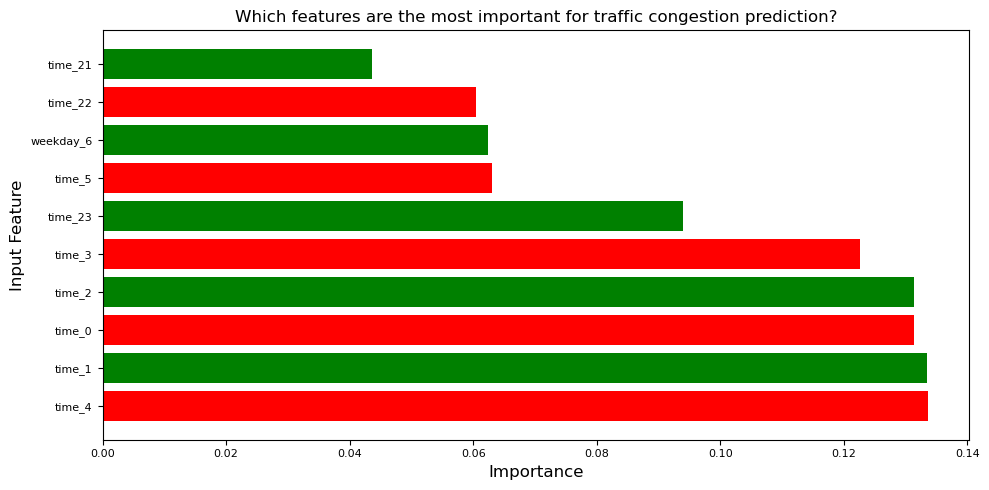

In [19]:
# Storing importance values from the trained model
dt_importance = dt_grid_model_cv.best_estimator_.feature_importances_

# Storing feature importance as a dataframe
dt_feature_imp = pd.DataFrame(list(zip(train_X.columns, dt_importance)),
               columns = ['Feature', 'Importance'])

dt_feature_imp = dt_feature_imp.sort_values('Importance', ascending = False).reset_index(drop = True)

# Bar plot
dt_feature_imp_nonzero = dt_feature_imp[dt_feature_imp['Importance'] > 0.015]
dt_fig = plt.figure(figsize=(10, 5))
plt.barh(dt_feature_imp_nonzero['Feature'], dt_feature_imp_nonzero['Importance'], color = ['red', 'green'])

plt.xlabel("Importance", fontsize = 12)
plt.ylabel("Input Feature", fontsize = 12)
plt.title('Which features are the most important for traffic congestion prediction?', fontsize = 12) 
plt.yticks(fontsize = 8) # fontsize of yticks
plt.xticks(fontsize = 8) # fontsize of xticks

plt.tight_layout();
dt_fig.savefig('dt_traffic_feature_imp.svg')

In [20]:
# Save DT Pickle
dt_pickle = open('dt_traffic.pickle', 'wb') 

# Write DT model to the file
pickle.dump(dt_grid_model_cv, dt_pickle) 

# Close the file
dt_pickle.close() 

In [21]:
rf_regress = RandomForestRegressor(random_state=11)

In [22]:
# RF Model
n_estimators = [int(x) for x in np.linspace(start = 50, stop = 500, num = 5)]

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(2, 20, num = 5)]

# Minimum number of samples required to split a node
min_samples_split = [5, 10, 20]

# Minimum number of samples required at each leaf node
min_samples_leaf = [5, 10, 20]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

pprint(random_grid)

{'max_depth': [2, 6, 11, 15, 20],
 'min_samples_leaf': [5, 10, 20],
 'min_samples_split': [5, 10, 20],
 'n_estimators': [50, 162, 275, 387, 500]}


In [23]:
rf_folds = KFold(n_splits=3,shuffle=True,random_state=99)

rf_random_model_cv = RandomizedSearchCV(estimator=rf_regress,
                                        param_distributions=random_grid,
                                        n_iter =20,
                                        scoring = 'r2',
                                        cv = rf_folds,
                                        verbose =1,
                                        n_jobs =-1)

In [24]:
start = time.time()            # Start Time
rf_random_model_cv.fit(train_X, train_y)  
stop = time.time()             # End Time
print(f"Training time: {stop - start}s")

Fitting 3 folds for each of 20 candidates, totalling 60 fits
Training time: 447.9464228153229s


In [25]:
print('Initial score: ', rf_random_model_cv.best_score_)

# Return set of parameters with the best performance
print('Initial parameters: ', rf_random_model_cv.best_params_)

Initial score:  0.9395098304422437
Initial parameters:  {'n_estimators': 50, 'min_samples_split': 5, 'min_samples_leaf': 5, 'max_depth': 20}


In [26]:
rf_grid_params = {
    'n_estimators': [250,275,300],
    'max_depth': [15,20,25],
    'min_samples_split': [15,20,25],
    'min_samples_leaf': [3,4,5,6]
}

In [27]:
# Retune RF with grid search cv
rf_grid_model_cv = GridSearchCV(estimator = rf_regress, 
                                param_grid = rf_grid_params, 
                                scoring= 'r2', 
                                cv = rf_folds, 
                                verbose = 1,
                                n_jobs = -1)

In [28]:
start = time.time()            # Start Time
rf_grid_model_cv.fit(train_X, train_y)  
stop = time.time()             # End Time
print(f"Training time: {stop - start}s")

Fitting 3 folds for each of 108 candidates, totalling 324 fits
Training time: 11207.777131795883s


In [29]:
print('Improved score: ', rf_grid_model_cv.best_score_)
print('Improved parameters: ', rf_grid_model_cv.best_params_)

Improved score:  0.9497797350067736
Improved parameters:  {'max_depth': 25, 'min_samples_leaf': 3, 'min_samples_split': 15, 'n_estimators': 300}


In [30]:
rf_pickle = open('rf_traffic.pickle', 'wb') 

# Write DT model to the file
pickle.dump(rf_grid_model_cv, rf_pickle) 

# Close the file
rf_pickle.close() 

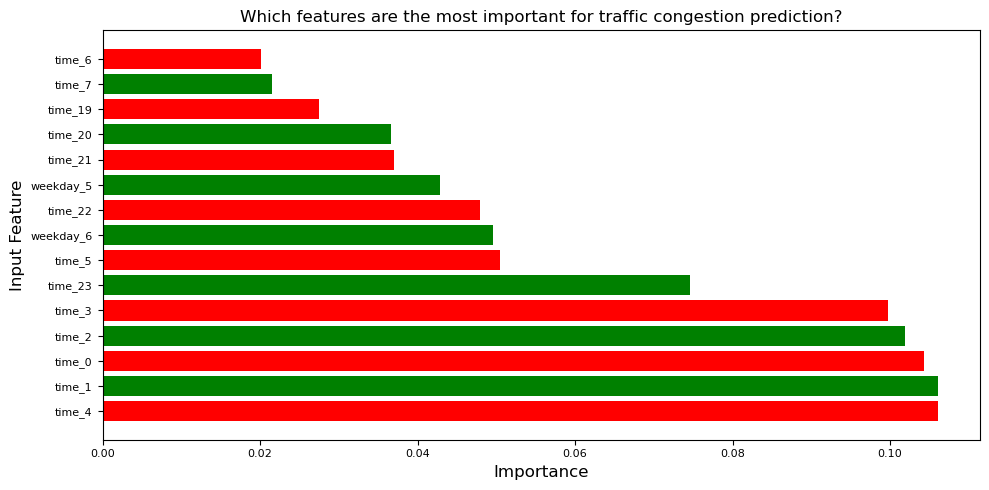

In [31]:
# Storing importance values from the trained model
rf_importance = rf_grid_model_cv.best_estimator_.feature_importances_

# Storing feature importance as a dataframe
rf_feature_imp = pd.DataFrame(list(zip(train_X.columns, rf_importance)),
               columns = ['Feature', 'Importance'])

rf_feature_imp = rf_feature_imp.sort_values('Importance', ascending = False).reset_index(drop = True)

# Bar plot
rf_feature_imp_nonzero = rf_feature_imp[rf_feature_imp['Importance'] > 0.015]
plt.figure(figsize=(10, 5))
plt.barh(rf_feature_imp_nonzero['Feature'], rf_feature_imp_nonzero['Importance'], color = ['red', 'green'])

plt.xlabel("Importance", fontsize = 12)
plt.ylabel("Input Feature", fontsize = 12)
plt.title('Which features are the most important for traffic congestion prediction?', fontsize = 12) 
plt.yticks(fontsize = 8) # fontsize of yticks
plt.xticks(fontsize = 8) # fontsize of xticks

plt.tight_layout();

In [32]:
base_dt = DecisionTreeRegressor(random_state=98)

In [33]:
# ADA Boost
ada_reg = AdaBoostRegressor(DecisionTreeRegressor(max_depth=15))

hyper_params_ada = {
    'learning_rate': [0.2,0.4,0.6,0.8],
    'n_estimators':[50,100,150,200]
}

In [34]:
ada_folds = KFold(n_splits=5,shuffle=True,random_state=68)

ada_reg_model_cv = RandomizedSearchCV(estimator = ada_reg, 
                                      n_iter = 100,
                                      param_distributions=hyper_params_ada,
                                      scoring = 'r2', 
                                      cv = ada_folds, 
                                      verbose = 1,
                                      random_state = 42,
                                      n_jobs = -1) 

In [35]:
start = time.time()            # Start Time
ada_reg_model_cv.fit(train_X, train_y)
stop = time.time()             # End Time
print(f"Training time: {stop - start}s")

Fitting 5 folds for each of 16 candidates, totalling 80 fits
Training time: 2773.2302780151367s


In [36]:
# Return the performance metric score
print('Initial score: ', ada_reg_model_cv.best_score_)

# Return set of parameters with the best performance
print('Initial parameters: ', ada_reg_model_cv.best_params_)

Initial score:  0.944198078043524
Initial parameters:  {'n_estimators': 100, 'learning_rate': 0.2}


In [37]:
# Retune with grid search
hyper_params_ada_new = {
    'learning_rate': [0.1,0.2,0.3],
    'n_estimators':[90,100,110,125]}


In [38]:
ada_reg_model_grid_cv = GridSearchCV(estimator = ada_reg, 
                                      param_grid=hyper_params_ada_new,
                                      scoring = 'r2', 
                                      cv = ada_folds, 
                                      verbose = 1,
                                      n_jobs = -1) 

In [39]:
start = time.time()            # Start Time
ada_reg_model_grid_cv.fit(train_X, train_y)
stop = time.time()             # End Time
print(f"Training time: {stop - start}s")

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Training time: 2084.1748418807983s


In [40]:
print('Improved score: ', ada_reg_model_grid_cv.best_score_)
print('Improved parameters: ', ada_reg_model_grid_cv.best_params_)

Improved score:  0.944067302637654
Improved parameters:  {'learning_rate': 0.2, 'n_estimators': 90}


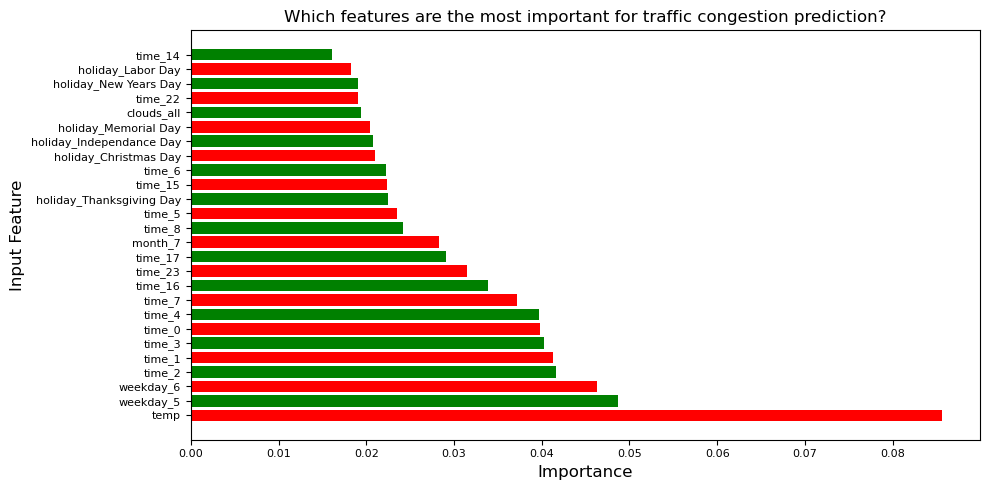

In [41]:
# Storing importance values from the trained model
ada_importance = ada_reg_model_grid_cv.best_estimator_.feature_importances_

# Storing feature importance as a dataframe
ada_feature_imp = pd.DataFrame(list(zip(train_X.columns, ada_importance)),
               columns = ['Feature', 'Importance'])

ada_feature_imp = ada_feature_imp.sort_values('Importance', ascending = False).reset_index(drop = True)

# Bar plot
ada_feature_imp_nonzero = ada_feature_imp[ada_feature_imp['Importance'] > 0.015]
ada = plt.figure(figsize=(10, 5))
plt.barh(ada_feature_imp_nonzero['Feature'], ada_feature_imp_nonzero['Importance'], color = ['red', 'green'])

plt.xlabel("Importance", fontsize = 12)
plt.ylabel("Input Feature", fontsize = 12)
plt.title('Which features are the most important for traffic congestion prediction?', fontsize = 12) 
plt.yticks(fontsize = 8) # fontsize of yticks
plt.xticks(fontsize = 8) # fontsize of xticks

plt.tight_layout();
ada.savefig('ada_traffic_feature_imp.svg')

In [42]:
# Save DT Pickle
ada_pickle = open('ada_traffic.pickle', 'wb') 

# Write DT model to the file
pickle.dump(ada_reg_model_grid_cv, ada_pickle) 

# Close the file
ada_pickle.close() 

In [43]:
# XG Boost
base_xg = XGBRegressor()

In [44]:
#DTrain = 
xg_params = {'max_depth':[2,4,6,8,10],
             'n_estimators': [20,40,60]}
xg_folds = KFold(n_splits=3,shuffle=True,random_state=78)
xg_random_cv = RandomizedSearchCV(estimator=base_xg,
                                  param_distributions=xg_params,
                                  n_iter=20,
                                  scoring='r2',
                                  verbose=1,
                                  random_state=79,
                                  n_jobs=-1)

In [45]:
start = time.time()            # Start Time
xg_random_cv.fit(train_X, train_y)
stop = time.time()             # End Time
print(f"Training time: {stop - start}s")

Fitting 5 folds for each of 15 candidates, totalling 75 fits
Training time: 139.91116952896118s


In [46]:
# Return set of parameters with the best performance
print('Initial score: ', xg_random_cv.best_score_)
print('Initial parameters: ', xg_random_cv.best_params_)


Initial score:  0.9624533036295715
Initial parameters:  {'n_estimators': 60, 'max_depth': 10}


In [47]:
#retune with grid search

xg_params_new = {'max_depth':[8,10,12,14,16],
             'n_estimators': [50,60,70,80,100]}
xg_reg_model_grid_cv = GridSearchCV(estimator = base_xg, 
                                      param_grid=xg_params_new,
                                      scoring = 'r2', 
                                      cv = xg_folds, 
                                      verbose = 1,
                                      n_jobs = -1) 



In [48]:
start = time.time()            # Start Time
xg_reg_model_grid_cv.fit(train_X, train_y)
stop = time.time()             # End Time
print(f"Training time: {stop - start}s")

Fitting 3 folds for each of 25 candidates, totalling 75 fits
Training time: 42.0776309967041s


In [49]:
print('Improved score: ', xg_reg_model_grid_cv.best_score_)
print('Improved parameters: ', xg_reg_model_grid_cv.best_params_)

Improved score:  0.9619593334495663
Improved parameters:  {'max_depth': 8, 'n_estimators': 100}


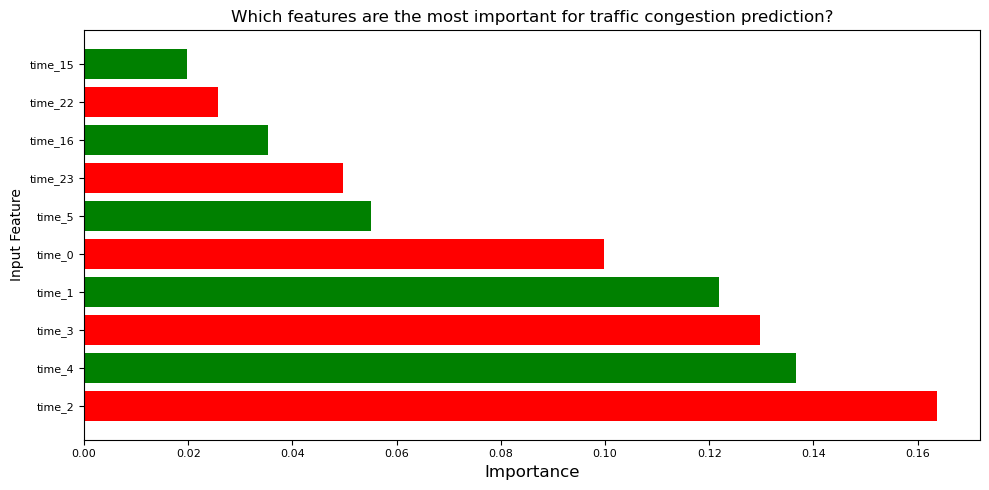

In [50]:
# Storing importance values from the trained model
xg_importance = xg_reg_model_grid_cv.best_estimator_.feature_importances_

# Storing feature importance as a dataframe
xg_feature_imp = pd.DataFrame(list(zip(train_X.columns, xg_importance)),
               columns = ['Feature', 'Importance'])

xg_feature_imp = xg_feature_imp.sort_values('Importance', ascending = False).reset_index(drop = True)

# Bar plot
xg_feature_imp_nonzero = xg_feature_imp[xg_feature_imp['Importance'] > 0.015]
xg_fig = plt.figure(figsize=(10, 5))
plt.barh(xg_feature_imp_nonzero['Feature'], xg_feature_imp_nonzero['Importance'], color = ['red', 'green'])

plt.xlabel("Importance", fontsize = 12)
plt.ylabel("Input Feature", fontsize = 10)
plt.title('Which features are the most important for traffic congestion prediction?', fontsize = 12) 
plt.yticks(fontsize = 8) # fontsize of yticks
plt.xticks(fontsize = 8) # fontsize of xticks

plt.tight_layout();
xg_fig.savefig('xg_traffic_feature_imp.svg')

In [51]:
#pickle
# Save DT Pickle
xg_pickle = open('xg_traffic.pickle', 'wb') 

# Write DT model to the file
pickle.dump(xg_reg_model_grid_cv, xg_pickle) 

# Close the file
xg_pickle.close() 

In [52]:
#r2 and RMSE Table
# run y_pred and then use sklearn metrics to create data table with scores
#r2 and RMSE Table
# run y_pred and then use sklearn metrics to create data table with scores
y_pred_tr_dt = dt_grid_model_cv.predict(test_X)
y_pred_tr_rf = rf_grid_model_cv.predict(test_X)
y_pred_tr_ada = ada_reg_model_grid_cv.predict(test_X)
y_pred_tr_xg = xg_reg_model_grid_cv.predict(test_X)


dt_r2 = metrics.r2_score(test_y, y_pred_tr_dt)
dt_RMSE = np.sqrt(metrics.mean_squared_error(test_y,y_pred_tr_dt))
print(dt_r2)
print(dt_RMSE)
rf_r2 = metrics.r2_score(test_y, y_pred_tr_rf)
rf_RMSE = np.sqrt(metrics.mean_squared_error(test_y,y_pred_tr_rf))
ada_r2 = metrics.r2_score(test_y, y_pred_tr_ada)
ada_RMSE = np.sqrt(metrics.mean_squared_error(test_y,y_pred_tr_ada))
xg_r2 = metrics.r2_score(test_y, y_pred_tr_xg)
xg_RMSE = np.sqrt(metrics.mean_squared_error(test_y,y_pred_tr_xg))



0.7612554914244876
968.558806191564


In [53]:
scoring = {
    'ML Model':['Decision Tree','Random Forest','ADA Boost','XG Boost'],
    'R2 Score':[dt_r2,rf_r2,ada_r2,xg_r2],
    'RMSE Score': [dt_RMSE,rf_RMSE,ada_RMSE,xg_RMSE]
}
a = pd.DataFrame(scoring)
a.to_csv('ML_model_score.csv')